In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import os
import sys
import importlib
import numpy as np
import xarray as xr
import basin_masks
import streamfunction
import matplotlib.pyplot as plt

from functools import reduce

user_home_dir = os.getcwd()
sys.path.append(os.path.join(user_home_dir, "ECCOv4-py"))

import ecco_v4_py as ecco

In [2]:
importlib.reload(streamfunction)

<module 'streamfunction' from 'C:\\Users\\aline\\OTP\\streamfunction.py'>

In [3]:
DIR = "H:/.shortcut-targets-by-id/1wvJjD0RMTujKYaXQapEiGk-Mx03_KSin/"

parameter = "STRESS" # OBP - SSH - TEMP_SALINITY - STRESS
DATA_DIR = DIR + "GTC/solodoch_data_full/ECCO_L4_OCEAN_3D_VOLUME_FLUX_LLC0090GRID_MONTHLY_V4R4"
SAL_DIR = DIR + f"solodoch_data_full/26N/ECCO_L4_{parameter}_05DEG_MONTHLY_V4R4"

In [4]:
## Load ECCO variables
nc_files = (os.path.join(DATA_DIR, '*.nc'))
ds = xr.open_mfdataset(nc_files, data_vars='minimal',coords='minimal',compat='override')

geom_fp = 'ECCO_L4_GEOMETRY_LLC0090GRID_V4R4/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc'

ECCO_dir = os.path.join(user_home_dir,geom_fp)
ecco_grid = xr.open_dataset(ECCO_dir)
ds = xr.merge((ds, ecco_grid))
ds

<xarray.Dataset>
Dimensions:    (tile: 13, j_g: 90, i_g: 90, k_p1: 51, k_l: 50, j: 90, i: 90,
                time: 312, k: 50, nb: 4, k_u: 50, nv: 2)
Coordinates: (12/24)
    XG         (tile, j_g, i_g) float32 -115.0 -115.0 -115.0 ... -102.9 -109.0
    Zp1        (k_p1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
    Zl         (k_l) float32 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03
    YC         (tile, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    XC         (tile, j, i) float32 -111.6 -111.3 -110.9 ... -105.6 -111.9
    YG         (tile, j_g, i_g) float32 -88.18 -88.32 -88.46 ... -87.99 -88.02
    ...         ...
  * k_p1       (k_p1) int32 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * nb         (nb) float32 0.0 1.0 2.0 3.0
  * nv         (nv) float32 0.0 1.0
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T06:00:00
Data variables: (12/24)
    VVELMASS   (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    WVELMASS   (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    UVELMASS   (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    CS         (tile, j, i) float32 ...
    SN         (tile, j, i) float32 ...
    rA         (tile, j, i) float32 ...
    ...         ...
    hFacC      (k, tile, j, i) float32 ...
    hFacW      (k, tile, j, i_g) float32 ...
    hFacS      (k, tile, j_g, i) float32 ...
    maskC      (k, tile, j, i) bool ...
    maskW      (k, tile, j, i_g) bool ...
    maskS      (k, tile, j_g, i) bool ...
Attributes: (12/63)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Three-Dimensional Volume Flux...
    uuid:                            54fde4fa-4181-11eb-807f-0cc47a3f8057
    history_json:                    [{"$schema":"https:\/\/harmony.earthdata...

In [5]:
basin_masks.get_available_basin_names_solodoch()

['atlantic', 'indo-pacific', 'southern']

In [6]:
basin = 'southern'
latitudes = basin_masks.get_lats_of_interest_solodoch(basin)
print(latitudes)

latitude = latitudes[1]
longitudes = basin_masks.get_longitudes_at_latitude(latitude, basin, geom_fp)
longitude_sections = np.split(longitudes, np.where(np.diff(longitudes) > 1)[0] + 1)
print(longitude_sections)

[-55, -60]
get_basin_name:  ['pac', 'atl', 'ind', 'arct', 'bering', 'southChina', 'mexico', 'okhotsk', 'hudson', 'med', 'java', 'north', 'japan', 'timor', 'eastChina', 'red', 'gulf', 'baffin', 'gin', 'barents'] C:\Users\aline\OTP\ECCOv4-py\binary_data
load_binary_array: loading file C:\Users\aline\OTP\ECCOv4-py\binary_data\basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
[array([-179.5, -178.5, -177.5, -176.5, -175.5, -174.5, -173.5, -172.5,
       -171.5, -170.5, -169.5, -168.5, -167.5, -166.5, -165.5, -164.5,
       -163.5, -162.5, -161.5, -160.5, -159.5, -158.5, -157.5, -156.5,
       -155.5, -154.5, -153.5, -152.5, -151.5, -150.5, -149.5, -148.5,
       -147.5, -146.5, -145.5, -144.5, -143.5, -142.5, -141.5, -1

In [14]:
masks_W = []
masks_S = [] 
masks_C = []

for section in longitude_sections:
    maskC, maskW, maskS = ecco.get_section_line_masks([section[0], latitude],[section[-1], latitude], ds)
    masks_C.append(maskC)
    masks_W.append(maskW)
    masks_S.append(maskS)
    
maskC_tot = reduce(lambda x, y: x | y, masks_C)
maskS_tot = reduce(lambda x, y: x | y, masks_S)
maskW_tot = reduce(lambda x, y: x | y, masks_W)

plt.figure(figsize=(12,6))
#ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,maskC_tot,cmap='viridis',projection_type='Mercator',user_lon_0=0);

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [11]:
def format_lat_lon(value):
    """Format latitude or longitude with N/S or E/W suffix."""
    if value < 0:
        return f"{abs(value)}S"
    else:
        return f"{value}N"

In [12]:
%%time
PSI = ecco.calc_section_stf(
    ds, maskW=maskW, maskS=maskS, section_name=f"{format_lat_lon(latitude)}", zonal_average=True).compute()
OUTPUT_DIR = os.path.join(DIR, "GTC/streamfunctions_ecco")
PSI.to_netcdf(os.path.join(OUTPUT_DIR, f'{format_lat_lon(latitude)}', f'PSI_zonal_average_{format_lat_lon(latitude)}.nc'))

CPU times: total: 1min 56s
Wall time: 4min 39s


In [51]:
%%time
PSI = ecco.calc_section_stf(
    ds,maskW=maskW_tot, maskS=maskS_tot, section_name= f"PSI at {latitudes[0]} latitude" ).compute()
OUTPUT_DIR = os.path.join(DIR, "GTC/streamfunctions_ecco")
PSI.to_netcdf(os.path.join(OUTPUT_DIR, f'{format_lat_lon(latitude)}', f'PSI_{format_lat_lon(latitude)}.nc'))

<xarray.DataArray (time: 312, k: 50, tile: 13, j: 90, i_g: 90)>
dask.array<absolute, shape=(312, 50, 13, 90, 90), dtype=float32, chunksize=(1, 1, 13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
    Z        (k) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
  * i_g      (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T06:00:00


C:\Users\aline\OTP\ECCOv4-py\ecco_v4_py\get_section_masks.py:51: UserWarning: 
Section name psiat-55latitude unavailable as pre-defined section
  warnings.warn('\nSection name %s unavailable as pre-defined section' % section_name)


CPU times: total: 2min 33s
Wall time: 7min 9s


In [135]:
PSI_26 = xr.open_dataset(os.path.join(OUTPUT_DIR, "26.5N", "PSI_26.5N.nc"))
PSI_30 = xr.open_dataset(os.path.join(OUTPUT_DIR, "30S", "PSI_30S.nc"))
PSI_30_0 = xr.open_dataset(os.path.join(OUTPUT_DIR, "30S", "PSI_30S_section_0.nc"))
PSI_60 = xr.open_dataset(os.path.join(OUTPUT_DIR, "60S", "PSI_60S.nc"))
PSI_55 = xr.open_dataset(os.path.join(OUTPUT_DIR, "55S", "PSI_55S.nc"))

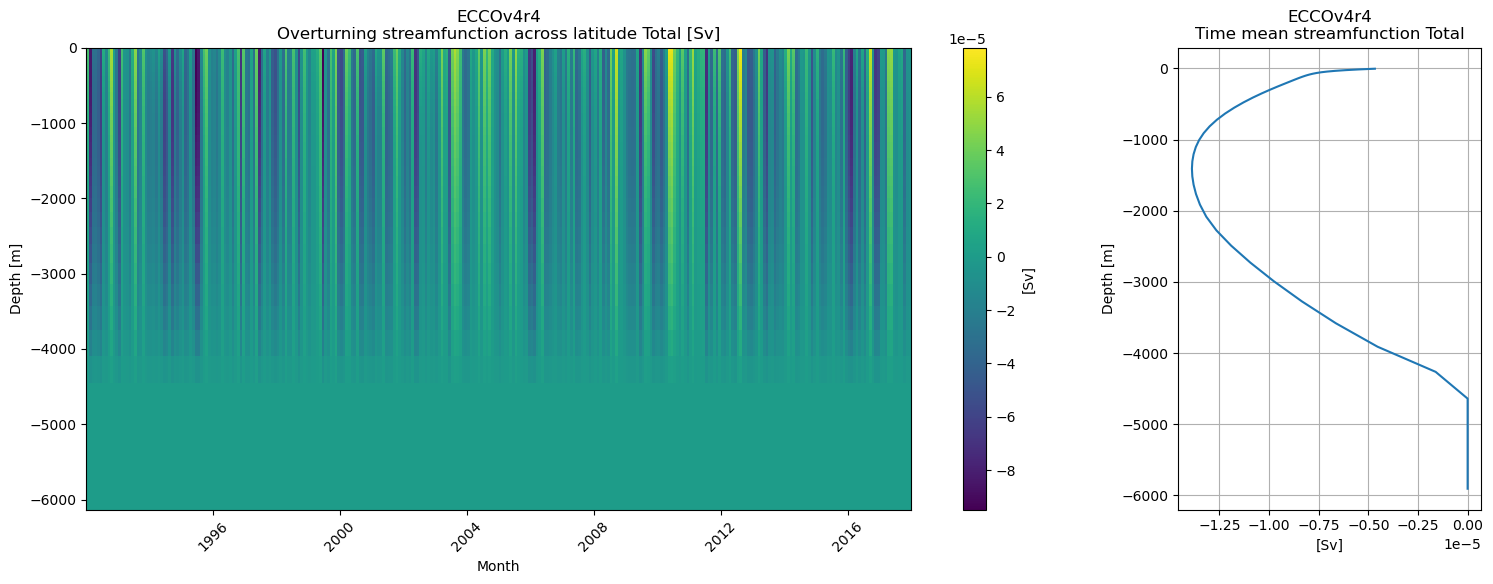

In [13]:
streamfunction.plot_depth_stf_vs_time(PSI,'Total', 'psi_moc')

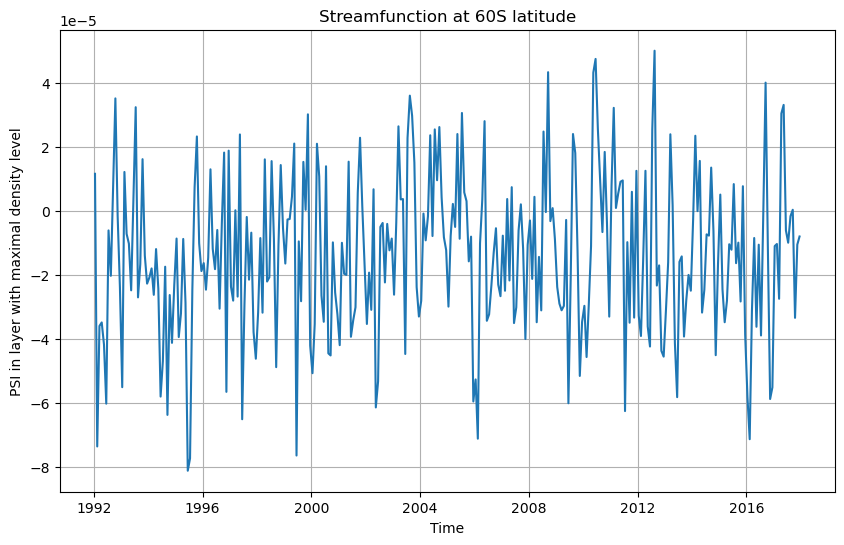

In [17]:
folder = '60S'
PSI = xr.open_dataset(os.path.join(OUTPUT_DIR, folder, f"PSI_zonal_average_{folder}.nc"))
PSI_MAX_DENS = streamfunction.get_PSI_at_max_density_level(PSI)
streamfunction.plot_2D_streamfunction(PSI_MAX_DENS, f"Streamfunction at {folder} latitude")

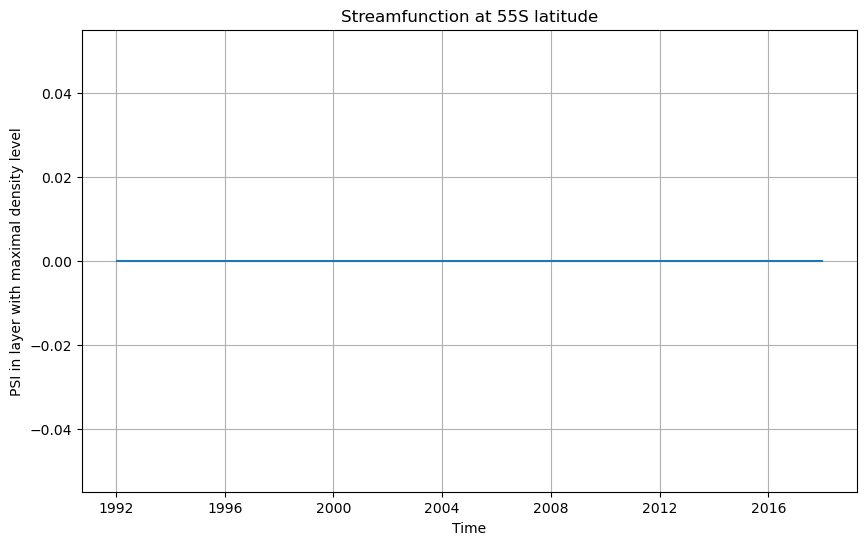

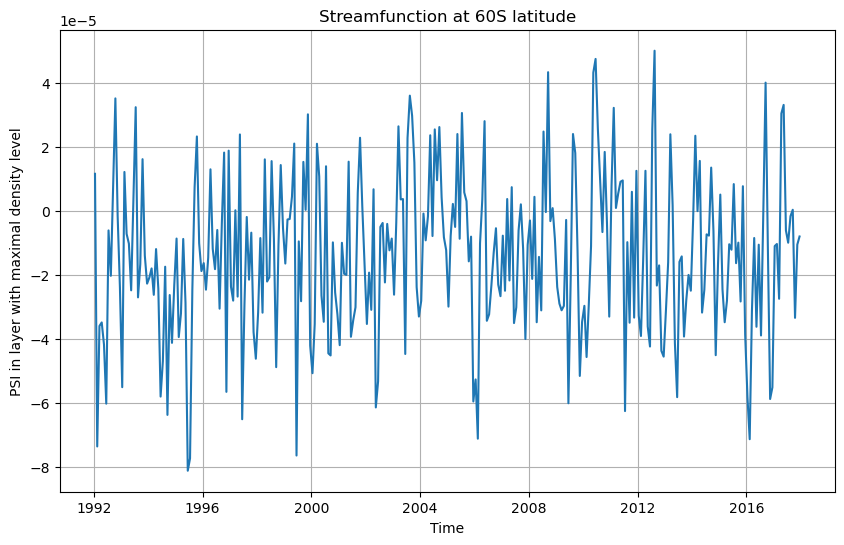

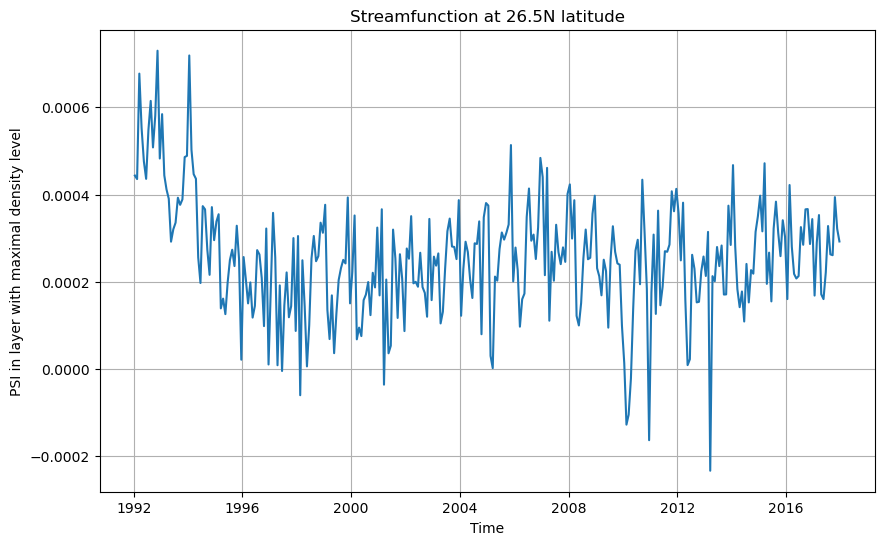

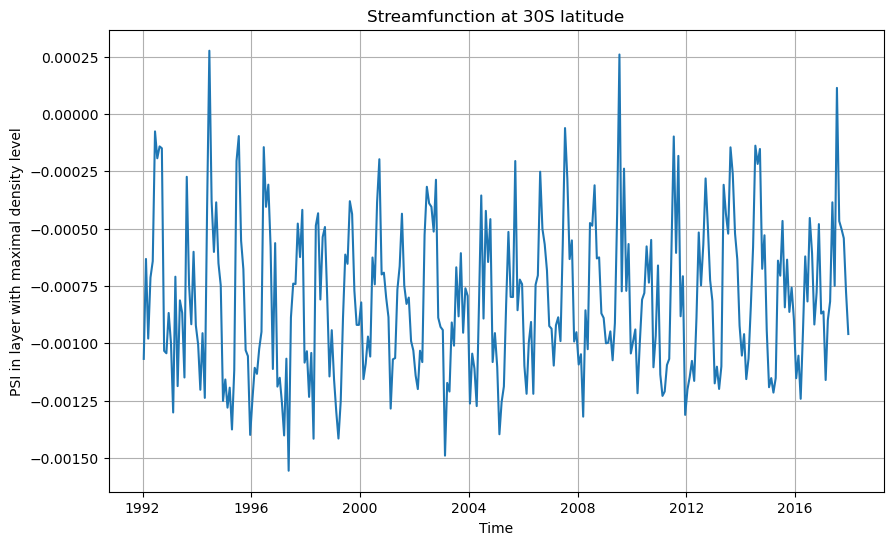

In [19]:
for folder in os.listdir(OUTPUT_DIR):
    PSI = xr.open_dataset(os.path.join(OUTPUT_DIR, folder, f"PSI_zonal_average_{folder}.nc"))
    PSI_MAX_DENS = streamfunction.get_PSI_at_max_density_level(PSI)
    streamfunction.plot_2D_streamfunction(PSI_MAX_DENS, f"Streamfunction at {folder} latitude")